In [1]:
from datascience import *
from collections import Counter
import numpy as np
%matplotlib inline

## Data

We are going to be using the same data set as last Thursday, the data is from the Incident Record-Type File of the NCVS. See page 31 of the codebook (on bCourses) for a description of the survey.

In [2]:
incidents = Table.read_table('../data/incident/36828-0004-Data.tsv', delimiter='\t')
incidents

V4001,YEARQ,IDHH,IDPER,V4002,V4003,V4004,V4005,V4006,V4008,V4009,V4010,V4011,V4012,V4013,V4014,V4015,V4016,V4017,V4018,V4019,V4021B,V4022,V4023,V4023B,V4024,V4025,V4026,V4027,V4028,V4029,V4030,V4031,V4032,V4033,V4034,V4035,V4036,V4037,V4038,V4039,V4040,V4041A,V4041B,V4041C,V4042,V4043,V4044,V4045,V4046,V4047,V4048,V4049,V4050,V4051,V4052,V4053,V4054,V4055,V4056,V4057,V4058,V4059,V4060,V4061,V4062,V4063,V4064,V4065,V4066,V4067,V4068,V4069,V4070,V4071,V4072,V4073,V4074,V4075,V4076,V4077,V4078,V4079,V4080,V4081,V4082,V4083,V4084,V4085,V4086,V4087,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096,V4097,V4098,V4099,V4100,V4101,V4102,V4103,V4104,V4105,V4106,V4107,V4108,V4109,V4110,V4111,V4112,V4113,V4114,V4115,V4116,V4117,V4118,V4119,V4120,V4121,V4122,V4123,V4124,V4125,V4126,V4127,V4128,V4129,V4130,V4131,V4132,V4133,V4134,V4135,V4136,V4137,V4138,V4139,V4140,V4140B1,V4140B2,V4140B3,V4140B4,V4140B5,V4140B6,V4140B7,V4140B8,V4140B9,V4140B10,V4140B11,V4140B12,V4140B13,V4140B14,V4140B15,V4140B16,V4140B17,V4140B18,V4140B19,V4140B20,V4140B21,V4140B22,V4140B23,V4140B24,V4140B25,V4140B26,V4140B27,V4140B28,V4140B29,V4140B30,V4140B31,V4140B32,V4140B33,V4140B34,V4140B35,V4140A,V4141,V4142,V4143,V4144,V4145,V4146,V4147,V4148,V4149,V4150,V4151,V4152,V4153,V4154,V4155,V4156,V4157,V4158,V4159,V4160,V4161,V4162,V4163,V4164,V4165,V4166,V4167,V4168,V4169,V4170,V4171,V4172,V4173,V4174,V4175,V4176,V4177,V4178,V4179,V4180,V4181,V4182,V4183,V4184,V4185,V4186,V4187,V4188,V4189,V4190,V4191,V4192,V4193,V4194,V4195,V4196,V4197,V4198,V4199,V4200,V4201,V4202,V4203,V4204,V4205,V4206,V4207,V4208,V4209,V4210,V4211,V4212,V4213,V4214,V4215,V4216,V4217,V4218,V4219,V4220,V4221,V4222,V4223,V4224,V4225,V4226,V4227,V4228,V4229,V4230,V4231,V4232,V4233,V4234,V4235,V4236,V4237,V4237A,V4238,V4239,V4240,V4241,V4242,V4243,V4244,V4245,V4246A,V4246B,V4246C,V4246D,V4246E,V4246F,V4246G,V4246H,V4247,V4248,V4249,V4250,V4251,V4252,V4252A,V4252B,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V4260,V4261,V4262,V4263,V4264,V4265,V4266,V4267,V4268,V4269,V4270,V4271,V4272,V4273,V4274,V4275,V4276,V4277,V4277A,V4277B,V4277C,V4277D,V4277E,V4278,V4279,V4280,V4281,V4282A,V4282B,V4282C,V4283,V4284,V4285A,V4286,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296,V4297,V4298,V4299,V4300,V4301,V4302,V4303,V4304,V4305,V4306,V4307,V4308,V4309,V4310,V4311,V4312,V4313,V4314,V4315,V4316,V4317,V4318,V4319,V4320,V4321,V4322,V4323,V4324,V4325,V4326,V4327,V4328,V4329,V4330,V4331,V4332,V4333,V4334,V4335,V4336,V4337,V4338,V4339,V4340,V4341,V4342,V4343,V4344,V4345,V4346,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356,V4357,V4357A,V4357B,V4358,V4359,V4360,V4361,V4362,V4363,V4364,V4365,V4366,V4367,V4368,V4369,V4370,V4371,V4372,V4373,V4374,V4375,V4376,V4377,V4378,V4379,V4380,V4381,V4382,V4383,V4384,V4385,V4386A,V4387,V4388,V4389,V4390,V4391,V4392,V4393,V4394,V4395,V4396,V4397,V4398,V4399,V4400,V4401,V4402,V4403,V4404,V4405,V4406,V4407,V4408,V4409,V4410,V4411,V4412,V4413,V4414,V4415,V4416,V4417,V4418,V4419,V4420,V4421,V4422,V4423,V4424,V4425,V4426,V4427,V4428,V4429,V4430,V4431,V4432,V4433,V4434,V4435,V4436,V4437,V4438,V4439,V4440,V4441,V4442,V4443,V4444,V4445,V4446,V4447,V4448,V4449,V4450,V4451,V4452,V4453,V4454,V4455,V4456,V4457,V4458,V4459,V4460,V4461,V4462,V4463,V4464,V4465,V4466,V4467,V4468,V4469,V4470,V4471,V4472,V4473,V4474,V4475,V4476,V4477,V4478,V4479,V4480,V4481A,V4481B,V4482,V4482A,V4482B,V4483,V4484,V4485,V4485A,V4486,V4487,V4488,V4489,V4490,V4491,V4492,V4493,V4494,V4495,V4496,V4497,V4498,V4499,V4500,V4501,V4502,V4503,V4504,V4505,V4506,V4507,V4508,V4509,V4510,V4511,V4512,V4513,V4514,V4515,V4516,V4517,V4518,V4519,V4520,V4522,V4522A,V4522B,V4522C,V4522D,V4522E,V4522F,V4522G,V4522H,V4522I,V4523,V4524,V4525,V4526,V4526AA,V4526A,V4526B,V4526C,V4526D,V4526E,V4526F,V4526G,V4526H,V4526HA1,V4526HA2,V4526HA3,V4526HA4,V4526HA5,V4526HA6,V4526HA7,V4526HA8,V4526HA9,V4526H3A,V4526H3B,V4526H4,V4526H5,V4526H6,V4526H7,V4526H9,V4526H10,V4527,SERIES_IWEIGHT,V4528,V4529,WGTVICCY,HELD,V4531,V4532,SERIES_WE

### Proportion of Incidents that are Hate Crimes

In [7]:
sum(incidents.column('V4526AA') == 1) / incidents.num_rows

0.022511756996376531

### Value of Property Lost

In [36]:
loss = incidents.where('V4364', are.below(99997))

In [41]:
nonzero_loss = loss.where("V4364", are.above(0))

In [42]:
np.mean(nonzero_loss.column('V4364'))

896.99387551630821

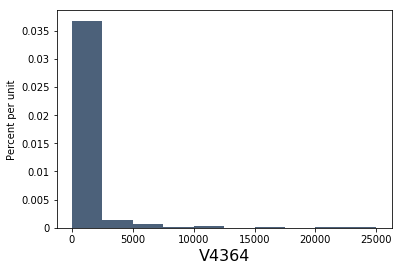

In [43]:
loss.hist('V4364')

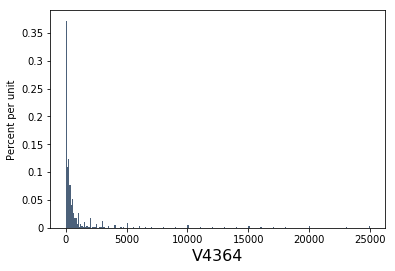

In [44]:
loss.hist('V4364', bins=range(0,25100,100))